In [45]:
"""In MLP we had to flatten the image before giving it as input to the neural network and the neural network was fully connected. The image in MNIST dataset
was of two dimensions but we were not taking the two dimensions into account."""
"""In CNN we take into considearion the two dimensions of the image into consideration. The three RGB layers can also be taken into consideration."""

'In CNN we take into considearion the two dimensions of the image into consideration. The three RGB layers can also be taken into consideration.'

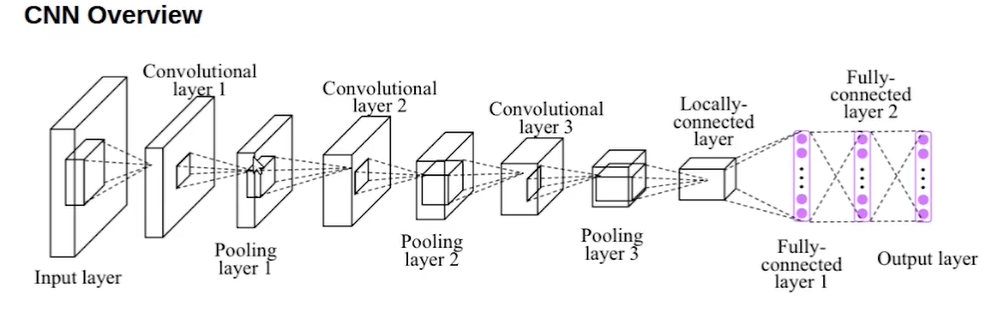

In [46]:
import numpy as np
import cv2 #open CV
import matplotlib.pyplot as plt
from keras.models import Sequential #one layer after another and so on.
from keras.layers import Dense,Dropout,Activation,Flatten #dense layers create fully connected layers.
from keras.layers import Conv2D,MaxPooling2D
from keras import utils #utils is used to plot the model.
from keras.utils import np_utils #np_utils converts all the parameters to categorical value.
import keras
from keras.datasets import mnist


In [47]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [48]:
y_train[0]

5

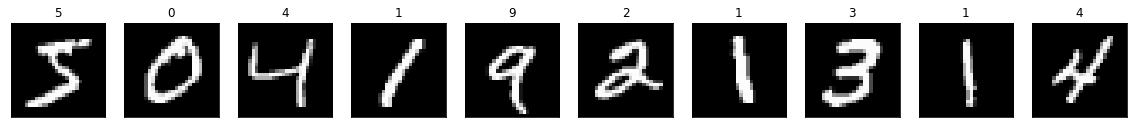

In [49]:
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i],)
  axes[i].imshow(X_train[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)

In [50]:
X_train.shape #the model doesnot know the depth of the image (1 for black and white image)

(60000, 28, 28)

In [51]:
X_train.shape[0]

60000

In [52]:
#to help the model know that the image has a depth, we have to apply reshape
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [53]:
X_train[0].shape #now the depth of the image has been included.

(28, 28, 1)

In [54]:
X_train[0] #we have to convert these integer values into float values.

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [55]:
y_train.shape

(60000,)

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [57]:
y_train[0] #our output should be a ten dimensional output to fit it into the model because we have ten labels[0,1,2,3,4,5,6,7,8,9].
#in the output we will be getting, the probability of each label.

5

In [58]:
#now converting training and testing to float 32
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

#nomalising (in mnist dataset black pixels are represented as 0 and white pixels are represented as 255)
#balck pixels remain as zero.
#White pixels are converted to one.
X_train /=255 
X_test /=255

#Converting value on each row in y_test and y_train to a 10 dimensional array.
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [59]:
y_train.shape

(60000, 10)

In [60]:
y_train[0].shape

(10,)

In [61]:
y_train[0] #here the numbers in the array represents the probability.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [62]:
#model training starts here
model=Sequential() #describing the type of model we will be using
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
#Conv2D stands for convolution 2D since the kernel is shifted in two different directions(x and y)
#32 is the number of filters we will be using. (3,3) is the kernel size.
model.add(MaxPooling2D((2,2))) #2D indicates that the kernel will be moving two different directions.
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax')) #here we cannot give any other activation except softmax.Softmax is very necessary in multiclass classification.
#softmax converts every values into probability, i.e it does the task of normalisation.
#The number of nodes in the last layer must be 10 because we will have 10 output classes.
#Each node will give the pribability of one class resepctively which will later be normalised by softmax.

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

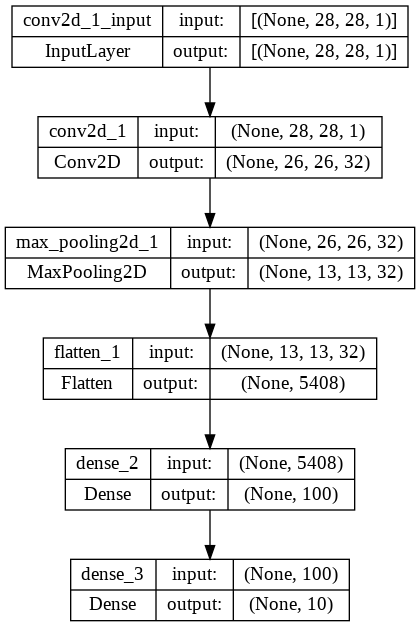

In [64]:
utils.plot_model(model,show_shapes=True)

#"None" in all the layers represents the batch size.
#we will mention the batch size when we will use fit()

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Since this is multiclass classification, we are using categorical cross entropy.
#Verbose =1 shows us the model training and the parameters below.

model.fit(X_train,y_train,batch_size=32,epochs=2,verbose=1,validation_data=(X_test,y_test))

Epoch 1/2
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1419 - accuracy: 0.9568 - val_loss: 0.0722 - val_accuracy: 0.9774
Epoch 2/2
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.0474 - val_accuracy: 0.9839


In [66]:
#model.save("mnist_cnn_model.h5")

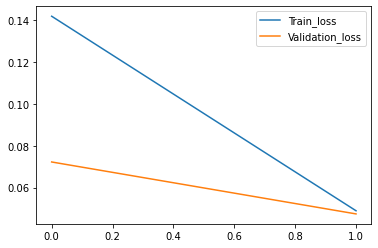

In [67]:
plt.plot(model.history.history['loss'],label='Train_loss')
plt.plot(model.history.history['val_loss'],label='Validation_loss')
plt.legend()

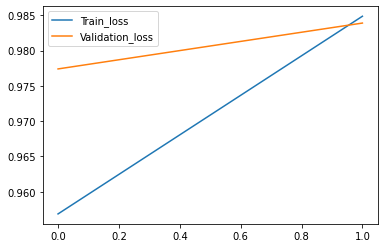

In [68]:
plt.plot(model.history.history['accuracy'],label='Train_loss')
plt.plot(model.history.history['val_accuracy'],label='Validation_loss')
plt.legend()

TypeError: ignored

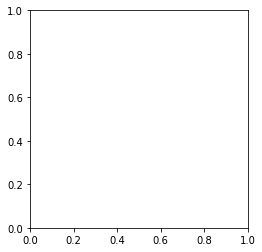

In [71]:
plt.imshow(X_test[2],cmap='gray')

In [72]:
m=np.reshape(X_test[2],(1,28,28,1))

np.argmax(model.predict(m)) #np.argmax returns the label for which the probability is maximum.

1/1 [==============================] - 0s 173ms/step


1

In [73]:
model.predict(m)

1/1 [==============================] - 0s 39ms/step


array([[3.5514020e-08, 9.9992478e-01, 1.5568656e-06, 1.5769015e-07,
        3.4646275e-06, 2.2250276e-06, 2.6180268e-07, 6.5870685e-05,
        1.4471173e-06, 7.9352333e-08]], dtype=float32)